In [ ]:
! git clone https://github.com/DeepConnectAI/challenge-week-2.git

Cloning into 'challenge-week-2'...
remote: Enumerating objects: 95, done.
remote: Counting objects: 100% (95/95), done.
remote: Compressing objects: 100% (81/81), done.
remote: Total 95 (delta 51), reused 30 (delta 11), pack-reused 0
Unpacking objects: 100% (95/95), done.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Adding Extra Column

In [ ]:
data = pd.read_csv("/content/challenge-week-2/data/simple_linear_data.csv")
value = [1]*395
df = pd.DataFrame(data) 
df = df.insert(0,"One's",value,False)


Print rows from 40 to 55.

In [ ]:
data[40:56]

,One's,G2,G3
40,1,50,55
41,1,60,60
42,1,90,90
43,1,40,55
44,1,50,45
45,1,40,30
46,1,60,55
47,1,95,100
48,1,75,70
49,1,35,35


In [ ]:
x = data['G2'].values

y = data['G3'].values
x_type = type(x)
x_shape = x.shape
y_type = type(y)
y_shape = y.shape
print(f'X: Type-{x_type}, Shape-{x_shape}')
print(f'y: Type-{y_type}, Shape-{y_shape}')

X: Type-<class 'numpy.ndarray'>, Shape-(395,)
y: Type-<class 'numpy.ndarray'>, Shape-(395,)


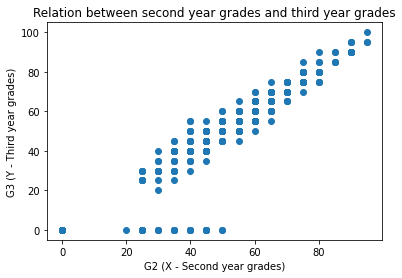

In [ ]:
# DO NOT EDIT THIS CODE CELL
plt.scatter(x,y)
plt.title('Relation between second year grades and third year grades')
plt.xlabel('G2 (X - Second year grades)')
plt.ylabel('G3 (Y - Third year grades)')
plt.show()

Pre processing

In [ ]:
mean = x.mean()
sig = x.std()

In [ ]:
x_train = (x-mean)/sig


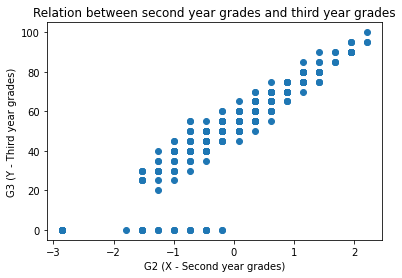

In [ ]:
# DO NOT EDIT THIS CODE CELL
plt.scatter(x_train,y)
plt.title('Relation between second year grades and third year grades')
plt.xlabel('G2 (X - Second year grades)')
plt.ylabel('G3 (Y - Third year grades)')
plt.show()

**Linear Regression From Scratch**

In [ ]:
def predict(X, weights):
    '''
    weights   : array (2,1) w0 and w1
    X         : array (m,2) x0 (intercept=1) and x1
    
    Returns predicted y using hyothesis linear function defined by given weights
    '''
    ### START CODE HERE ###
    y_pred = weights[1] + weights[0]*x
    ### END CODE HERE ###
    
    # assert (y_pred.shape==(X.shape[0],)), 'Wrong implementation of predict function. Check carefully'
    
    return y_pred

In [ ]:

def error(x, y,weights) :
  error = 0.0
  for i in range(len(x)):
    y_pred_i = predict(x[i],weights)
    prediction_error = y_pred_i - y[i]
    error += (prediction_error ** 2)
  mean_error = error/ 2*(len(x))
  
  return mean_error


    
    

In [ ]:
def gradient(x, y, weights): # to find the slope and intercept by partial derivative of loss function
    '''
    X      : array (m,2)
    y_true : array (m,1)
    y_pred : array (m,1)
    
    Returns a numpy array with gradients. Shape (2,1)
    '''
    # Initialize the gradient vector for w0 (intercept/bias) and w1 respectively
    m = x.shape[0]
    
    grad = np.zeros(2)
    y_pred_i = predict(x,weights)
    

    ### START CODE HERE ###
    for i in range(m):
      grad[0] +=  (y_pred_i[i] - y[i])
      grad[1] += (y_pred_i[i] - y[i])*x[i]
    
    ### END CODE HERE ###
    
    return grad/(2*m)

In [ ]:
def gradient_descent(x, y, learning_rate=0.01, max_iterations=100):
    '''
    X              : Array (m,2)
    y              : Array (m,1)
    learning_rate  : Learning rate
    max_iterations : Maximum iteratons
    
    Returns : weights vector (2,1)
            : losses (List)
    '''
    # Initialise weights vector of random values of size (2,1)
    weights = np.random.rand(2,1)
    # Initialize a list to record all the losses 
    losses  = []
    for i in range(max_iterations):
      loss = error(x,y,weights)
      losses.append(loss[0])

      grad = gradient(x,y,weights)

      #updation
      weights[0] = weights[0] - learning_rate*grad[0]
      weights[1] = weights[1] - learning_rate*grad[1]

      y_cap = predict(x_train,weights)
    plt.scatter(x,y,c="red")
    plt.scatter(x,y_cap,c="purple", label = "predicted")
    plt.show()

  
    ### START CODE HERE ###
    
    ### END CODE HERE ###
    
    return weights, losses

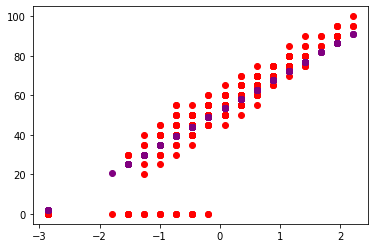

In [ ]:
optimal_weights, losses = gradient_descent(x_train, y)

In [ ]:

# DO NOT CHANGE THE FOLLOWING CODE CELLS
# Print final loss
print("Mean squared error:", losses[-1])

Mean squared error: 78950778.45979726


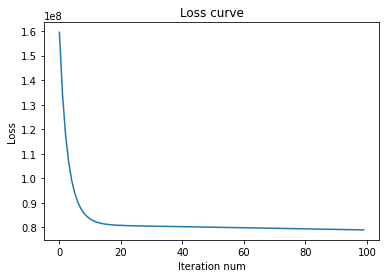

In [ ]:

# Plot the loss curve
plt.plot([i for i in range(len(losses))], losses)
plt.title("Loss curve")
plt.xlabel("Iteration num")
plt.ylabel("Loss")
plt.show()

In [ ]:

# Make predictions using trained weights
y_pred = predict(x, optimal_weights)

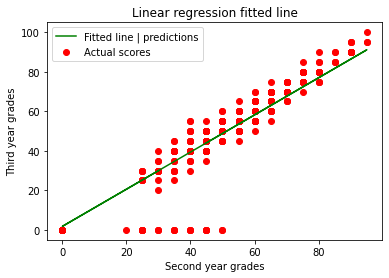

In [ ]:

# Visualize the results by plotting it
plt.scatter(x, y, c='r', label='Actual scores')
plt.plot(x, y_pred, c='g', label='Fitted line | predictions')
plt.legend()
plt.title("Linear regression fitted line")
plt.xlabel("Second year grades")
plt.ylabel("Third year grades")
plt.show()